In [ ]:
import py4DSTEM
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
from tqdm import tqdm
from PIL import Image

print(py4DSTEM.__version__)


0.14.9


In [ ]:
def defMaterial(positions, numbers, cell):
    material = py4DSTEM.process.diffraction.Crystal(positions, numbers, cell)
    material.plot_structure(figsize=(4,4))
    return material


In [ ]:
def simImg(material, thickness, thicknessStep = 1, semiAngle = 9.75, angleStep = 1, mistilt = 0, tiltStep = 1, zoneAxis = [0, 1, 1], accV = 200e3):
    # Calculate structure factors
    material.calculate_structure_factors(k_max=2.0, tol_structure_factor=0.0)

    # Convert the V_g to relativistic-corrected U_g
    material.calculate_dynamical_structure_factors(accV, "WK-CP", k_max=2.0, thermal_sigma=0.08, tol_structure_factor=0.0)

    # Generate a kinemaical diffraction pattern, which will set which beams are included in
    # the dynamical matrix.
    beams = material.generate_diffraction_pattern(zone_axis_lattice=zoneAxis, tol_intensity=0., k_max=2.5, tol_excitation_error_mult=1)

    py4DSTEM.process.diffraction.plot_diffraction_pattern(
        beams,
        scale_markers=1000,
        shift_labels=0.05,
        # shift_marker=0.004,
        min_marker_size=0,
        figsize = (4,4),
    )

    # Generate a converged beam electron diffraction pattern.
    thickness *= 10

    DP = material.generate_CBED(
        beams,
        thickness=thickness,
        alpha_mrad=semiAngle,
        pixel_size_inv_A=0.01,
        DP_size_inv_A=1.1, # Use this to crop the patterns, or leave as None to auto-size to fit the entire pattern
        zone_axis_lattice=zoneAxis,
    )

    fig,ax = py4DSTEM.visualize.show(
        DP,
        ticks = False,
        mask_alpha = 0.99,
        returnfig=True
    )

    fig.savefig(f"{(thickness/10):0.0f} nm.tif")
    fig.savefig(f"{(thickness/10):0.0f} nm.png")


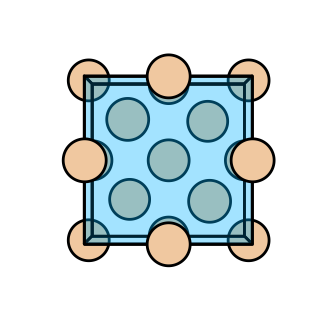

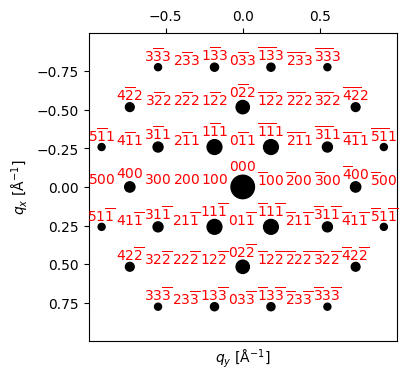

100%|██████████| 4765/4765 [02:19<00:00, 34.09it/s]


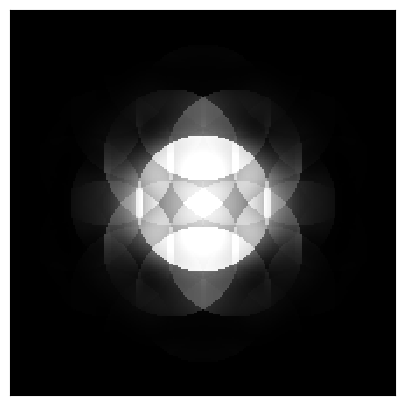

In [ ]:
Si = defMaterial(
    [[0.25, 0.75, 0.25],
     [0.0,  0.0,  0.5],
     [0.25, 0.25, 0.75],
     [0.0,  0.5,  0.0],
     [0.75, 0.75, 0.75],
     [0.5,  0.0,  0.0],
     [0.75, 0.25, 0.25],
     [0.5,  0.5,  0.5],],
    14,
    5.468728
)

# code for collecting user input

for i in range(1, 121):
    simImg(Si, i)
